In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

plt.style.use('bmh')


In [414]:
def check_null(df):
    """
    Check null values in dataframe
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['NULL values', 'Percent'])
    print(missing_data.head(20))
    

def handle_missing_data(df):
    
    #  Dropping rows if all values in that row are missing. 
    df.dropna(how='all')

    # removing column if it has more than 60% missing values 
    df2 = df[[column for column in df if df[column].count() / len(df) >= 0.4]]
    # print(len(df2.columns))
    # print(len(df.columns))
    if len(df.columns) - len(df2.columns)  > 0:
        print("List of dropped columns with more than 60% missing values:", end=" ")
        for c in df.columns:
            if c not in df2.columns:
                print(c, end=", ")
        print('\n')
    print(df2.shape)
    # drop the column if it has more than 60% missing values from the dataframe
    df.dropna(thresh=int(len(df)*0.6), axis=1, inplace=True)
    
    # df.dropna(inplace=True)       
    # df.fillna(inplace=True)
    


In [415]:
def analyize(df):
    # histogram of numerical columns
    df_num = df.select_dtypes(include=['float64', 'int64'])
    df_num.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()
    
    # boxplot of columns
    i = int(np.ceil(np.sqrt(len(df.columns))))
    print(i)
    df.plot(kind='box', subplots=True, layout=(i,i), sharex=False, sharey=False , figsize=(20, 20))
    plt.show()
    
    # heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, linewidths=0.5, annot_kws={'size': 20}, cmap='viridis' )
    plt.show()
    
    # ploting highly correlated features
    corr = df.corr()
    # print(corr)
    for i in corr.columns:
        for j in corr.columns:
            correlation = abs(corr[i][j])
            if correlation > 0.5 and i != j:
                print(f'{i} and {j} are highly correlated\n coorelation = {correlation}')
                plt.figure
                sns.pairplot(data=df,
                            x_vars=i,
                             y_vars=j, height=10)
                plt.show()
            if i == j :
                break;
            
            
    

In [416]:
# a function that performs automatic EDA on a file it can either be csv or xlsx
def auto_eda(in_path):
    if os.path.isfile(in_path):
        print(f'analyzing {in_path}')
        
        file_type = in_path.split('.')[-1]
        if file_type == 'csv':
            df = pd.read_csv(in_path)
        elif file_type == 'xlsx':
            df = pd.read_excel(in_path)
        else:
            print('File type not supported')
            return
    else:
        print(f'analyzing folder {in_path}')
        [auto_eda(os.path.join(in_path , i)) for i in os.listdir(in_path)]
        return

    # # print the columns of the dataframe
    print(df.columns)

    # print the info of the dataframe
    print(df.info())

    # print the describe of the dataframe
    print(df.describe())
    
    # check for null values
    check_null(df)
    
    # handling missing data with fillna
    # print(df.info())
    print(f'shape before handling missing data: {df.shape}')
    handle_missing_data(df)
    print(f'shape after handling missing data: {df.shape}')

    # analyzing data for visualizations
    analyize(df)
    
    print(f'end of analysis of {in_path}')


In [417]:
os.listdir('.')

['.git', 'Data Police shootings', 'EDA.ipynb', 'Retail Data Analytics']

analyzing folder .\data police shootings
analyzing .\data police shootings\fatal-police-shootings-data.csv
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null 

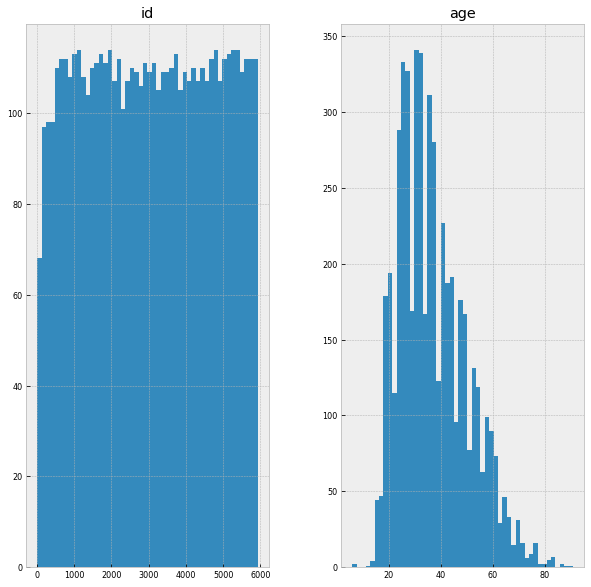

4


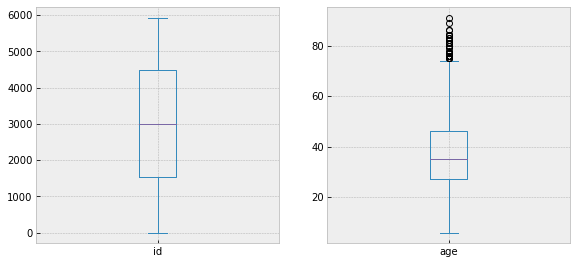

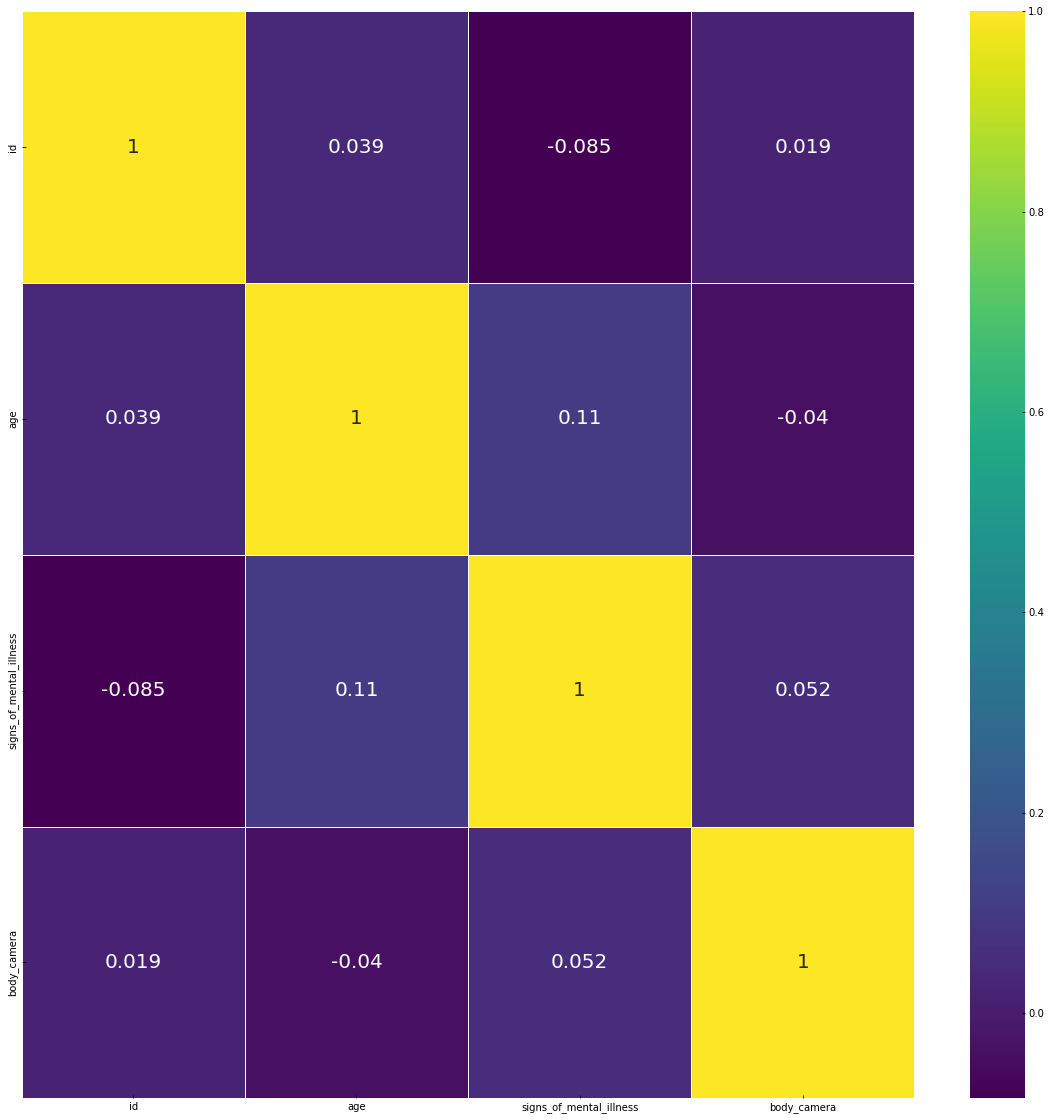

end of analysis of .\data police shootings\fatal-police-shootings-data.csv


In [418]:
# test the function 

auto_eda('.\\data police shootings')



analyzing folder .\Retail Data Analytics
analyzing .\Retail Data Analytics\Features data set.csv
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dty

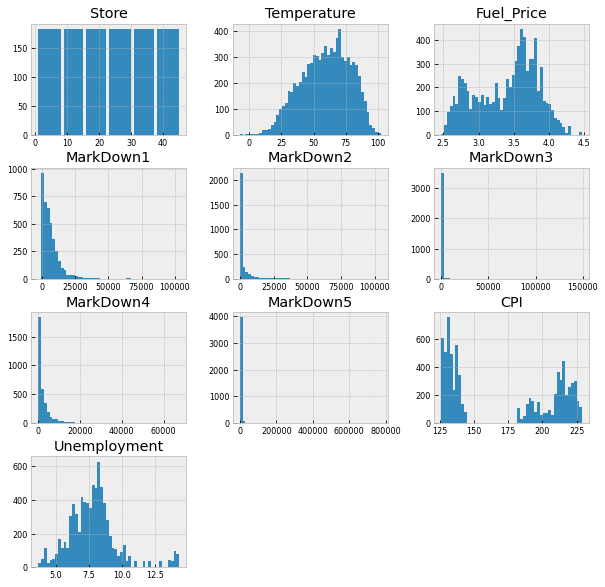

4


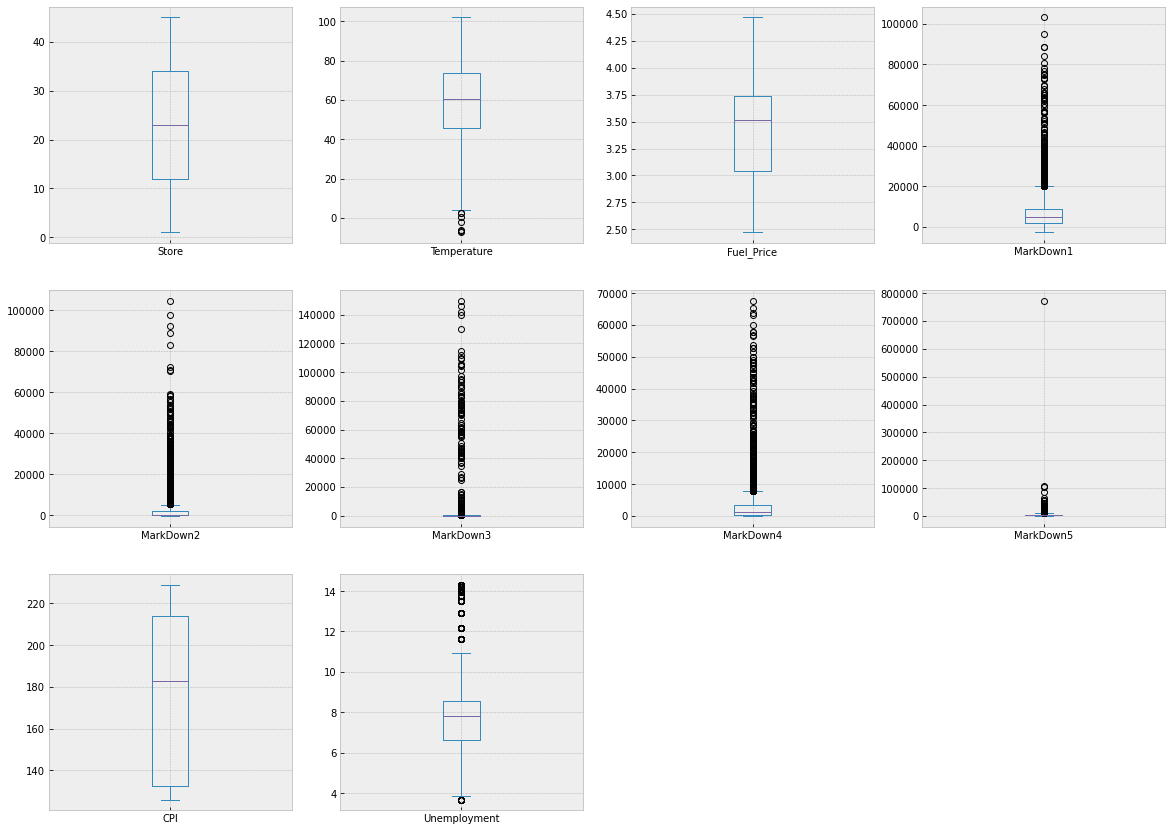

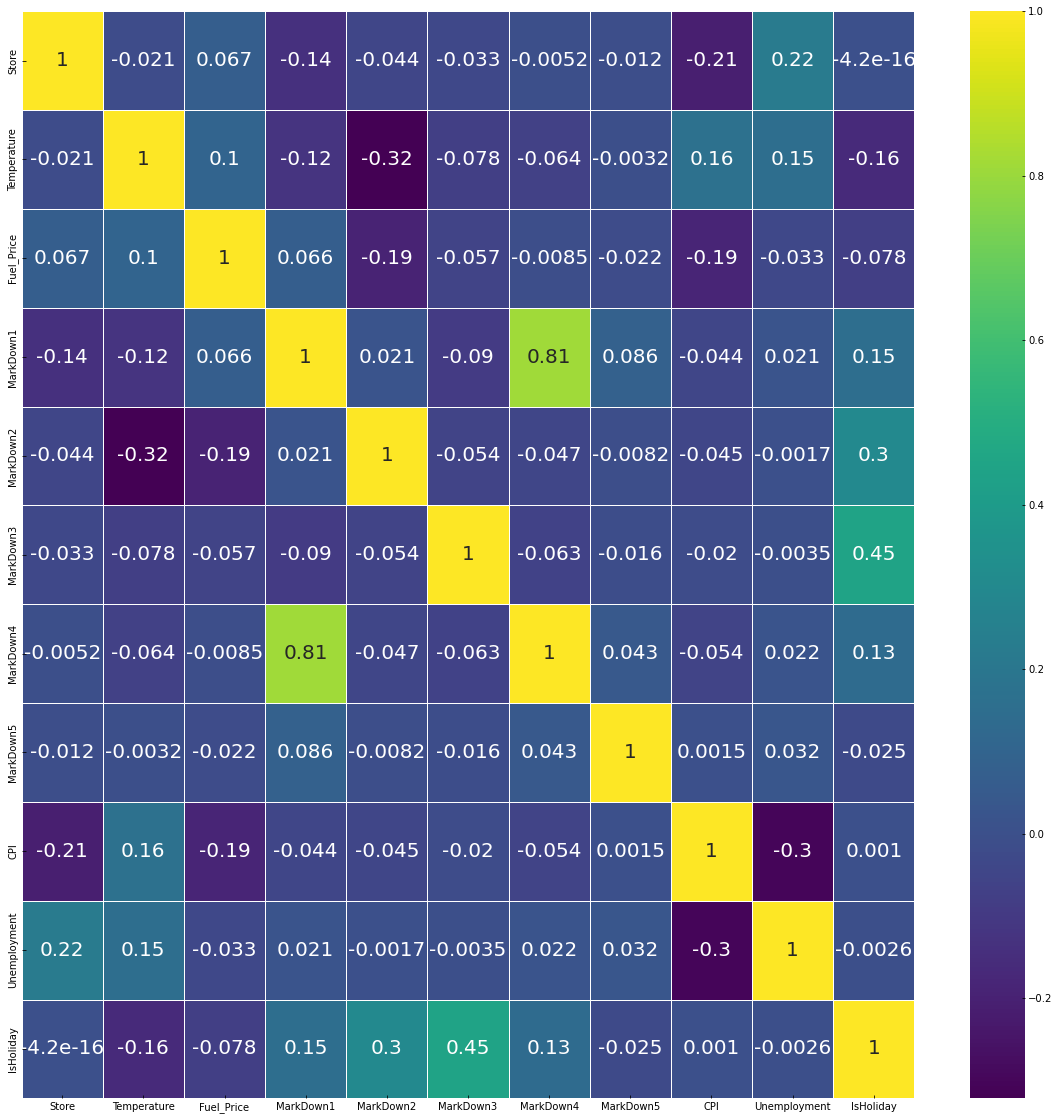

MarkDown4 and MarkDown1 are highly correlated
 coorelation = 0.8104553749412023


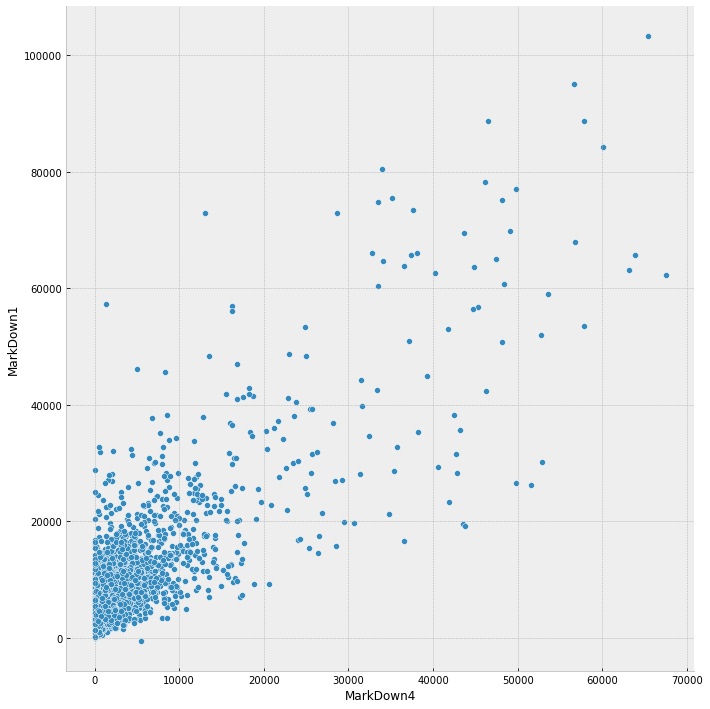

end of analysis of .\Retail Data Analytics\Features data set.csv
analyzing .\Retail Data Analytics\sales data-set.csv
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%

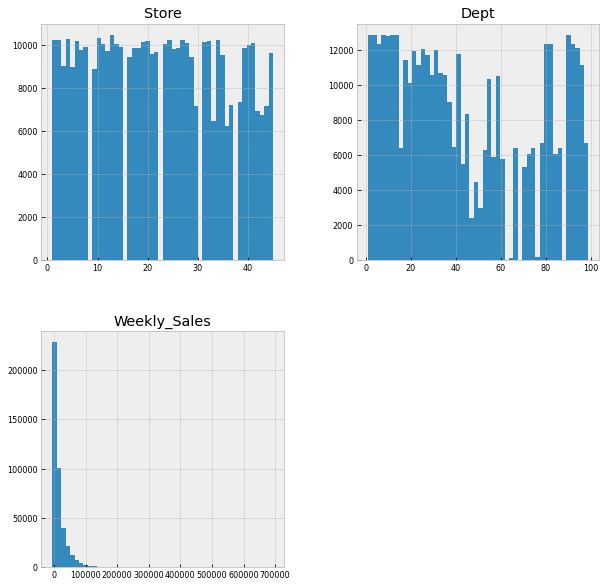

3


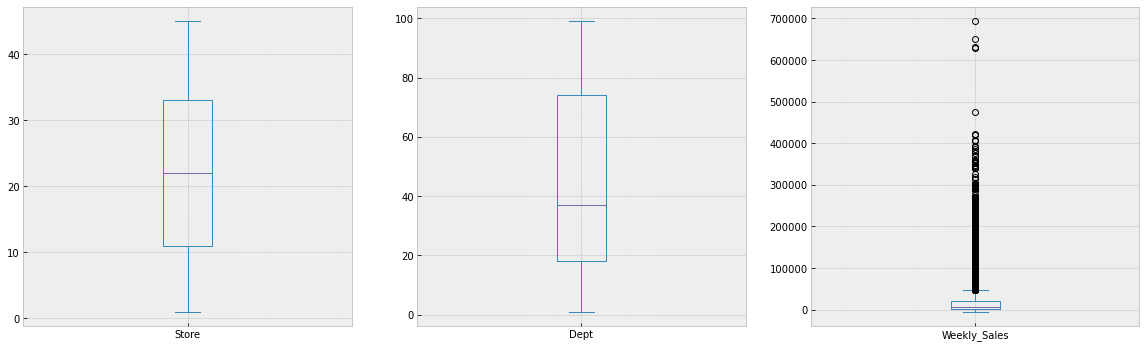

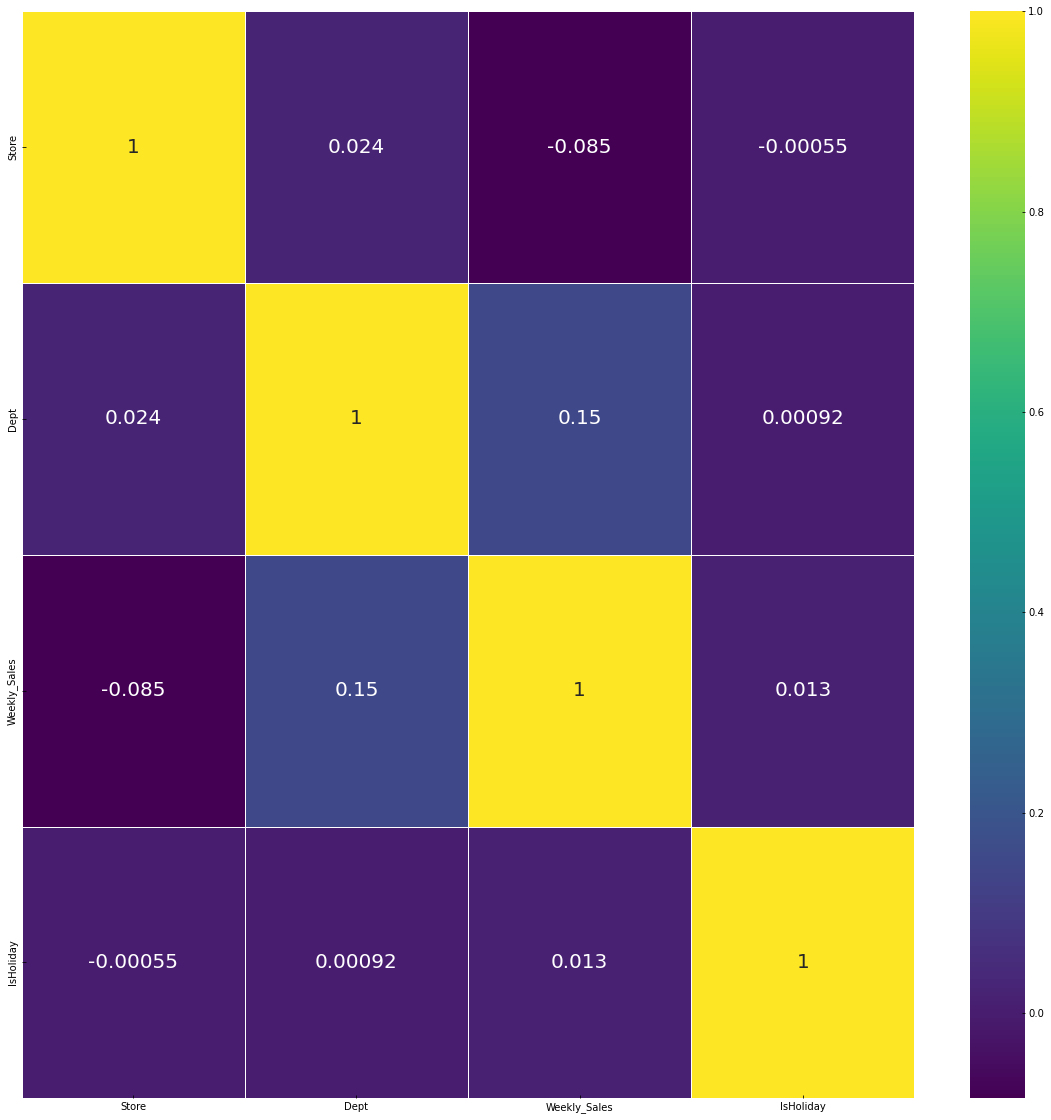

end of analysis of .\Retail Data Analytics\sales data-set.csv
analyzing .\Retail Data Analytics\stores data-set.csv
Index(['Store', 'Type', 'Size'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000
       NULL values  Percent
Store            0      0.0
Type             0      0.0
Size             0      0.0
shape before handling missing data: (45, 3)
(45, 3)
shape after handling missing data: (45, 3)


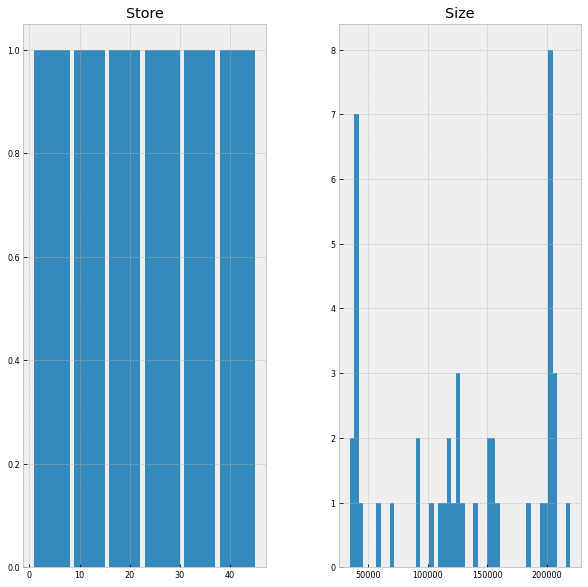

2


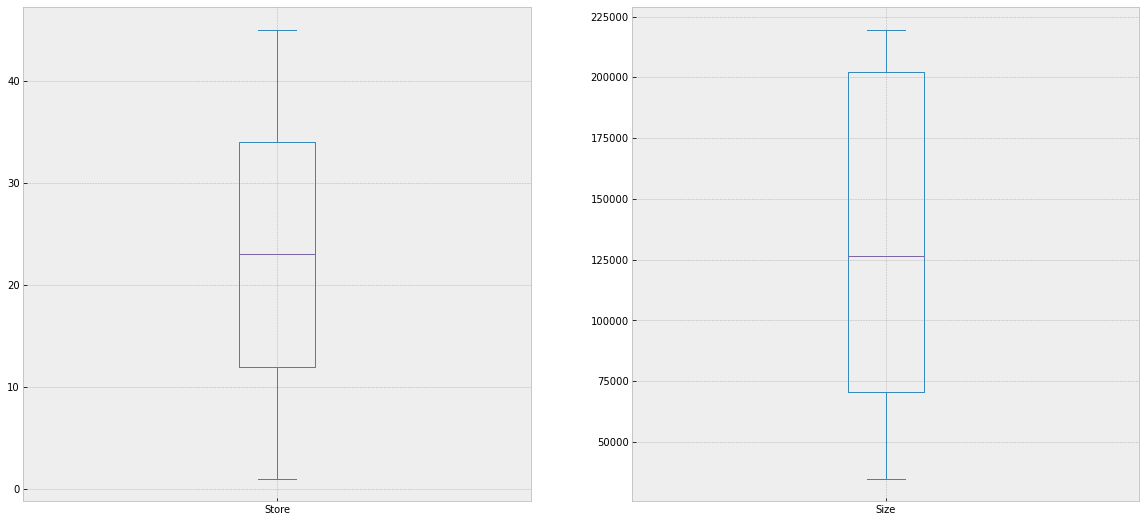

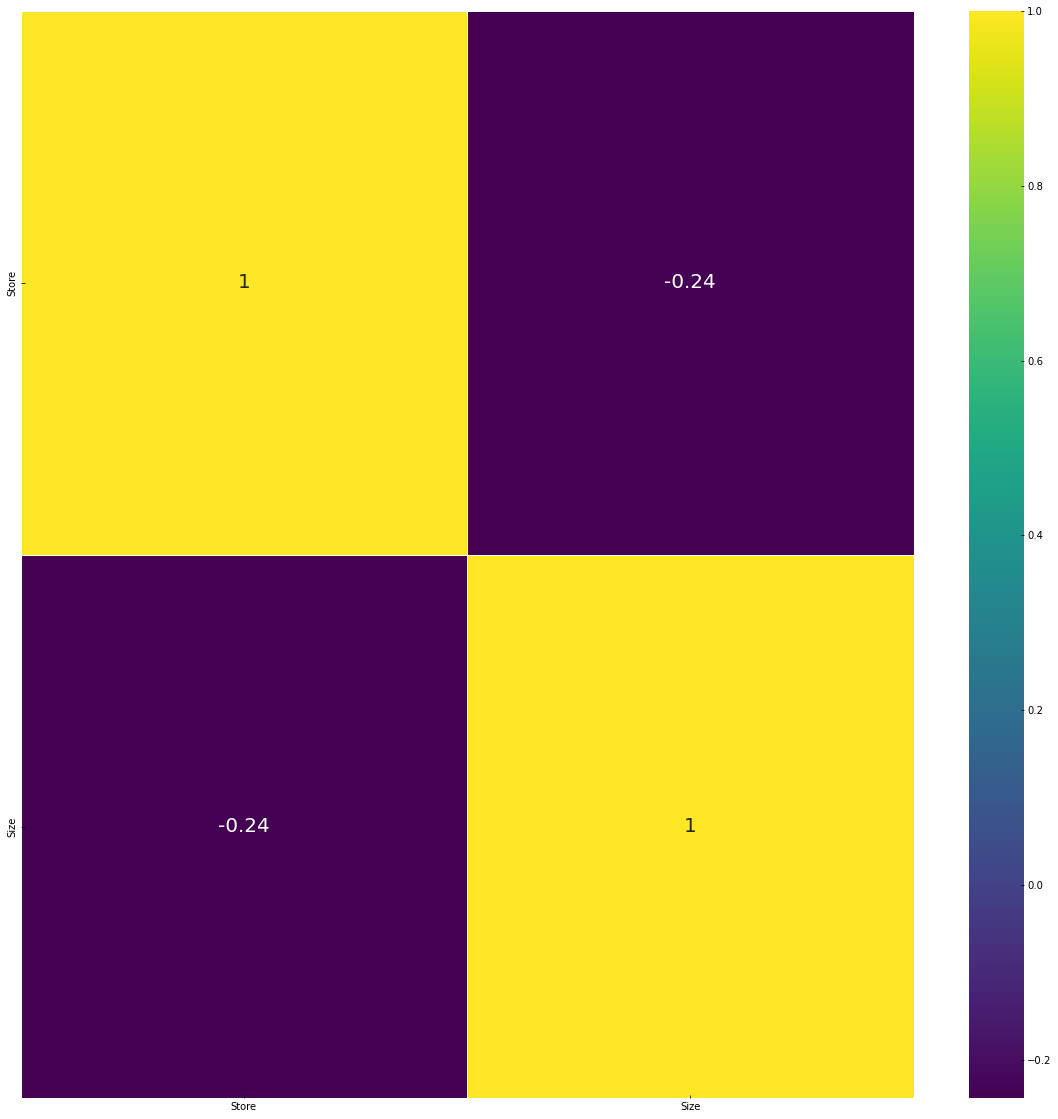

end of analysis of .\Retail Data Analytics\stores data-set.csv


In [419]:
# auto_eda('.\\Retail Data Analytics\\Features data set.csv')
auto_eda('.\\Retail Data Analytics')
# 